# Assignment 5

## Part A

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
from scipy.io import arff

dataset = arff.loadarff('yeast.arff')

dataset = pd.DataFrame(dataset[0])

X = dataset.iloc[:,:103]
Y = dataset.iloc[:,103:]



Y.head()



Class1 Class2 Class3 Class4 Class5 Class6 Class7 Class8 Class9 Class10  \
0   b'0'   b'0'   b'0'   b'0'   b'0'   b'0'   b'1'   b'1'   b'0'    b'0'   
1   b'0'   b'0'   b'1'   b'1'   b'0'   b'0'   b'0'   b'0'   b'0'    b'0'   
2   b'0'   b'1'   b'1'   b'0'   b'0'   b'0'   b'0'   b'0'   b'0'    b'0'   
3   b'0'   b'0'   b'1'   b'1'   b'0'   b'0'   b'0'   b'0'   b'0'    b'0'   
4   b'0'   b'0'   b'1'   b'1'   b'1'   b'1'   b'0'   b'0'   b'0'    b'0'   

  Class11 Class12 Class13 Class14  
0    b'0'    b'1'    b'1'    b'0'  
1    b'0'    b'0'    b'0'    b'0'  
2    b'0'    b'1'    b'1'    b'0'  
3    b'0'    b'0'    b'0'    b'0'  
4    b'0'    b'0'    b'0'    b'0'

In [95]:
Y = Y.map(int)


In [96]:
class_lists = Y.apply(lambda row: row.index[row == 1].tolist(), axis=1)

labels_df = pd.DataFrame({'Class List': class_lists})
labels_df['lengths'] = labels_df.apply(lambda row: len(row['Class List']),axis = 1)

print(labels_df)

                                      Class List  lengths
0             [Class7, Class8, Class12, Class13]        4
1                               [Class3, Class4]        2
2             [Class2, Class3, Class12, Class13]        4
3                               [Class3, Class4]        2
4               [Class3, Class4, Class5, Class6]        4
...                                          ...      ...
2412                            [Class2, Class3]        2
2413          [Class1, Class2, Class12, Class13]        4
2414  [Class6, Class7, Class8, Class12, Class13]        5
2415                          [Class12, Class13]        2
2416          [Class2, Class3, Class12, Class13]        4

[2417 rows x 2 columns]


In [97]:
single_class = labels_df[labels_df['lengths'] == 1].apply(lambda row: row['Class List'][-1], axis = 1)
   
single_class_counts = single_class.value_counts()

In [98]:
multi_class = labels_df.drop(single_class.index, axis = 0)
multi_class = multi_class.apply(lambda row: tuple(row['Class List']), axis = 1)


In [99]:
multi_class_counts = multi_class.value_counts()

In [100]:
top_single_class = [single_class_counts.keys()[0]]
top_multi_class = multi_class_counts.keys()[0]
top_multi_class = list(top_multi_class)






In [101]:
Y['Colour'] = labels_df['Class List'].apply(lambda x: 0 if x == top_single_class else 1 if x == top_multi_class else 2)

In [102]:
Y

Class1  Class2  Class3  Class4  Class5  Class6  Class7  Class8  Class9  \
0          0       0       0       0       0       0       1       1       0   
1          0       0       1       1       0       0       0       0       0   
2          0       1       1       0       0       0       0       0       0   
3          0       0       1       1       0       0       0       0       0   
4          0       0       1       1       1       1       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2412       0       1       1       0       0       0       0       0       0   
2413       1       1       0       0       0       0       0       0       0   
2414       0       0       0       0       0       1       1       1       0   
2415       0       0       0       0       0       0       0       0       0   
2416       0       1       1       0       0       0       0       0       0   

      Class10  Class11  Class12  Class13  Class14  Colour  
0           0        0        1        1        0       2  
1           0        0        0        0        0       2  
2           0        0        1        1        0       2  
3           0        0        0        0        0       2  
4           0        0        0        0        0       2  
...       ...      ...      ...      ...      ...     ...  
2412        0        0        0        0        0       2  
2413        0        0        1        1        0       2  
2414        0        0        1        1        0       2  
2415        0        0        1        1        0       2  
2416        0        0        1        1        0       2  

[2417 rows x 15 columns]

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[X.columns] = scaler.fit_transform(X)

In [104]:
X

Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0     0.030752 -1.742591 -1.601326 -1.468980  0.594010  0.271117  2.023802   
1    -1.079454  0.125835 -1.010264 -0.564893 -0.094933  0.499948 -0.326167   
2     5.224059  4.109170  3.008988  0.902018  0.107939 -0.070783 -0.075781   
3     1.210780  0.049537 -0.020516  0.742552  0.446738 -0.533913  0.757376   
4     0.419587  0.076533 -0.708369  0.832919 -0.510222  0.914530 -0.062317   
...        ...       ...       ...       ...       ...       ...       ...   
2412 -1.241975  0.017319 -1.262593 -0.162742 -0.628667  0.930832 -0.457120   
2413  0.864084  0.603135  0.875152 -0.218276  0.699192  0.304770  0.792065   
2414  0.835324 -0.972103 -0.222684 -0.485387 -0.408590  0.417417  0.570273   
2415 -1.355394  0.095069 -0.094141 -0.610577 -0.438150  0.429598  1.200310   
2416 -1.773790 -0.675419  1.723832  2.543268  0.808420  0.165007 -0.926560   

          Att8      Att9     Att10  ...     Att94     Att95     Att96  \
0     0.428070  0.683885 -0.584890  ...  0.074380 -0.139039 -0.142884   
1    -0.809579 -0.847347 -0.167984  ...  0.090608  0.281957 -0.886751   
2     0.136654 -0.433427 -0.252502  ...  1.040237 -0.469629 -0.924791   
3    -0.083592  0.813679  0.642590  ... -0.890019  2.067892 -0.781802   
4     0.661644 -1.396200  0.711754  ... -0.639827  0.454017 -0.589400   
...        ...       ...       ...  ...       ...       ...       ...   
2412  2.364046 -0.753573  1.887883  ...  0.266435 -0.583250 -0.572599   
2413  0.112889  0.535192  0.682979  ... -0.849106 -0.785280  3.072094   
2414  0.117053 -0.319115 -0.125942  ... -0.062710 -0.386019 -0.668639   
2415  0.381966 -0.899617  1.411980  ...  0.920297  0.338307 -0.126780   
2416 -2.204384 -2.920952 -1.932699  ...  3.869091 -0.606661 -0.026914   

         Att97     Att98     Att99    Att100    Att101    Att102    Att103  
0    -0.162409 -0.115009  0.020075 -0.320076 -0.178076  0.320417  1.178867  
1     1.143263  0.521680  0.307877 -0.645355 -0.423947 -0.859425  0.096189  
2    -0.101735 -0.128129  3.284185 -0.278757  0.299908 -0.717769 -1.308110  
3     2.028035  1.583559 -0.286180 -0.755161 -0.930956 -0.538974 -0.518363  
4     0.283393  0.304769 -0.514501  0.250775 -0.637002 -0.380569  0.606249  
...        ...       ...       ...       ...       ...       ...       ...  
2412 -0.520719  0.189561  0.744308 -0.618848 -0.845014 -0.710028 -0.063796  
2413 -0.797458 -0.795931 -0.752182 -0.528602 -0.408606  3.670945 -1.784379  
2414 -0.717936 -0.715192 -0.406552  2.844987 -0.694523  2.789908 -1.337813  
2415  1.394115  2.214700 -1.124309 -0.834826 -1.282421 -0.244132 -0.056891  
2416 -0.172801  0.560149 -0.172910 -0.834259 -0.868477 -0.680941  0.112787  

[2417 rows x 103 columns]

## Part B

In [107]:
from sklearn.manifold import TSNE
import pandas as pd

perp_vals = [5, 15, 30, 50, 55, 60]
results = {}

for p in perp_vals:
    print(f"Running t-SNE for perplexity={p}...")
    tsne_model = TSNE(n_components=2, perplexity=p, random_state=42)
    tsne_res = tsne_model.fit_transform(X)
    
    df_p = pd.DataFrame(tsne_res, columns=['d1', 'd2'])
    df_p['c'] = Y['Colour'].values
    results[p] = df_p

print("All t-SNE computations are complete.")

Running t-SNE for perplexity=5...
Running t-SNE for perplexity=15...
Running t-SNE for perplexity=30...
Running t-SNE for perplexity=50...
Running t-SNE for perplexity=55...
Running t-SNE for perplexity=60...
All t-SNE computations are complete.


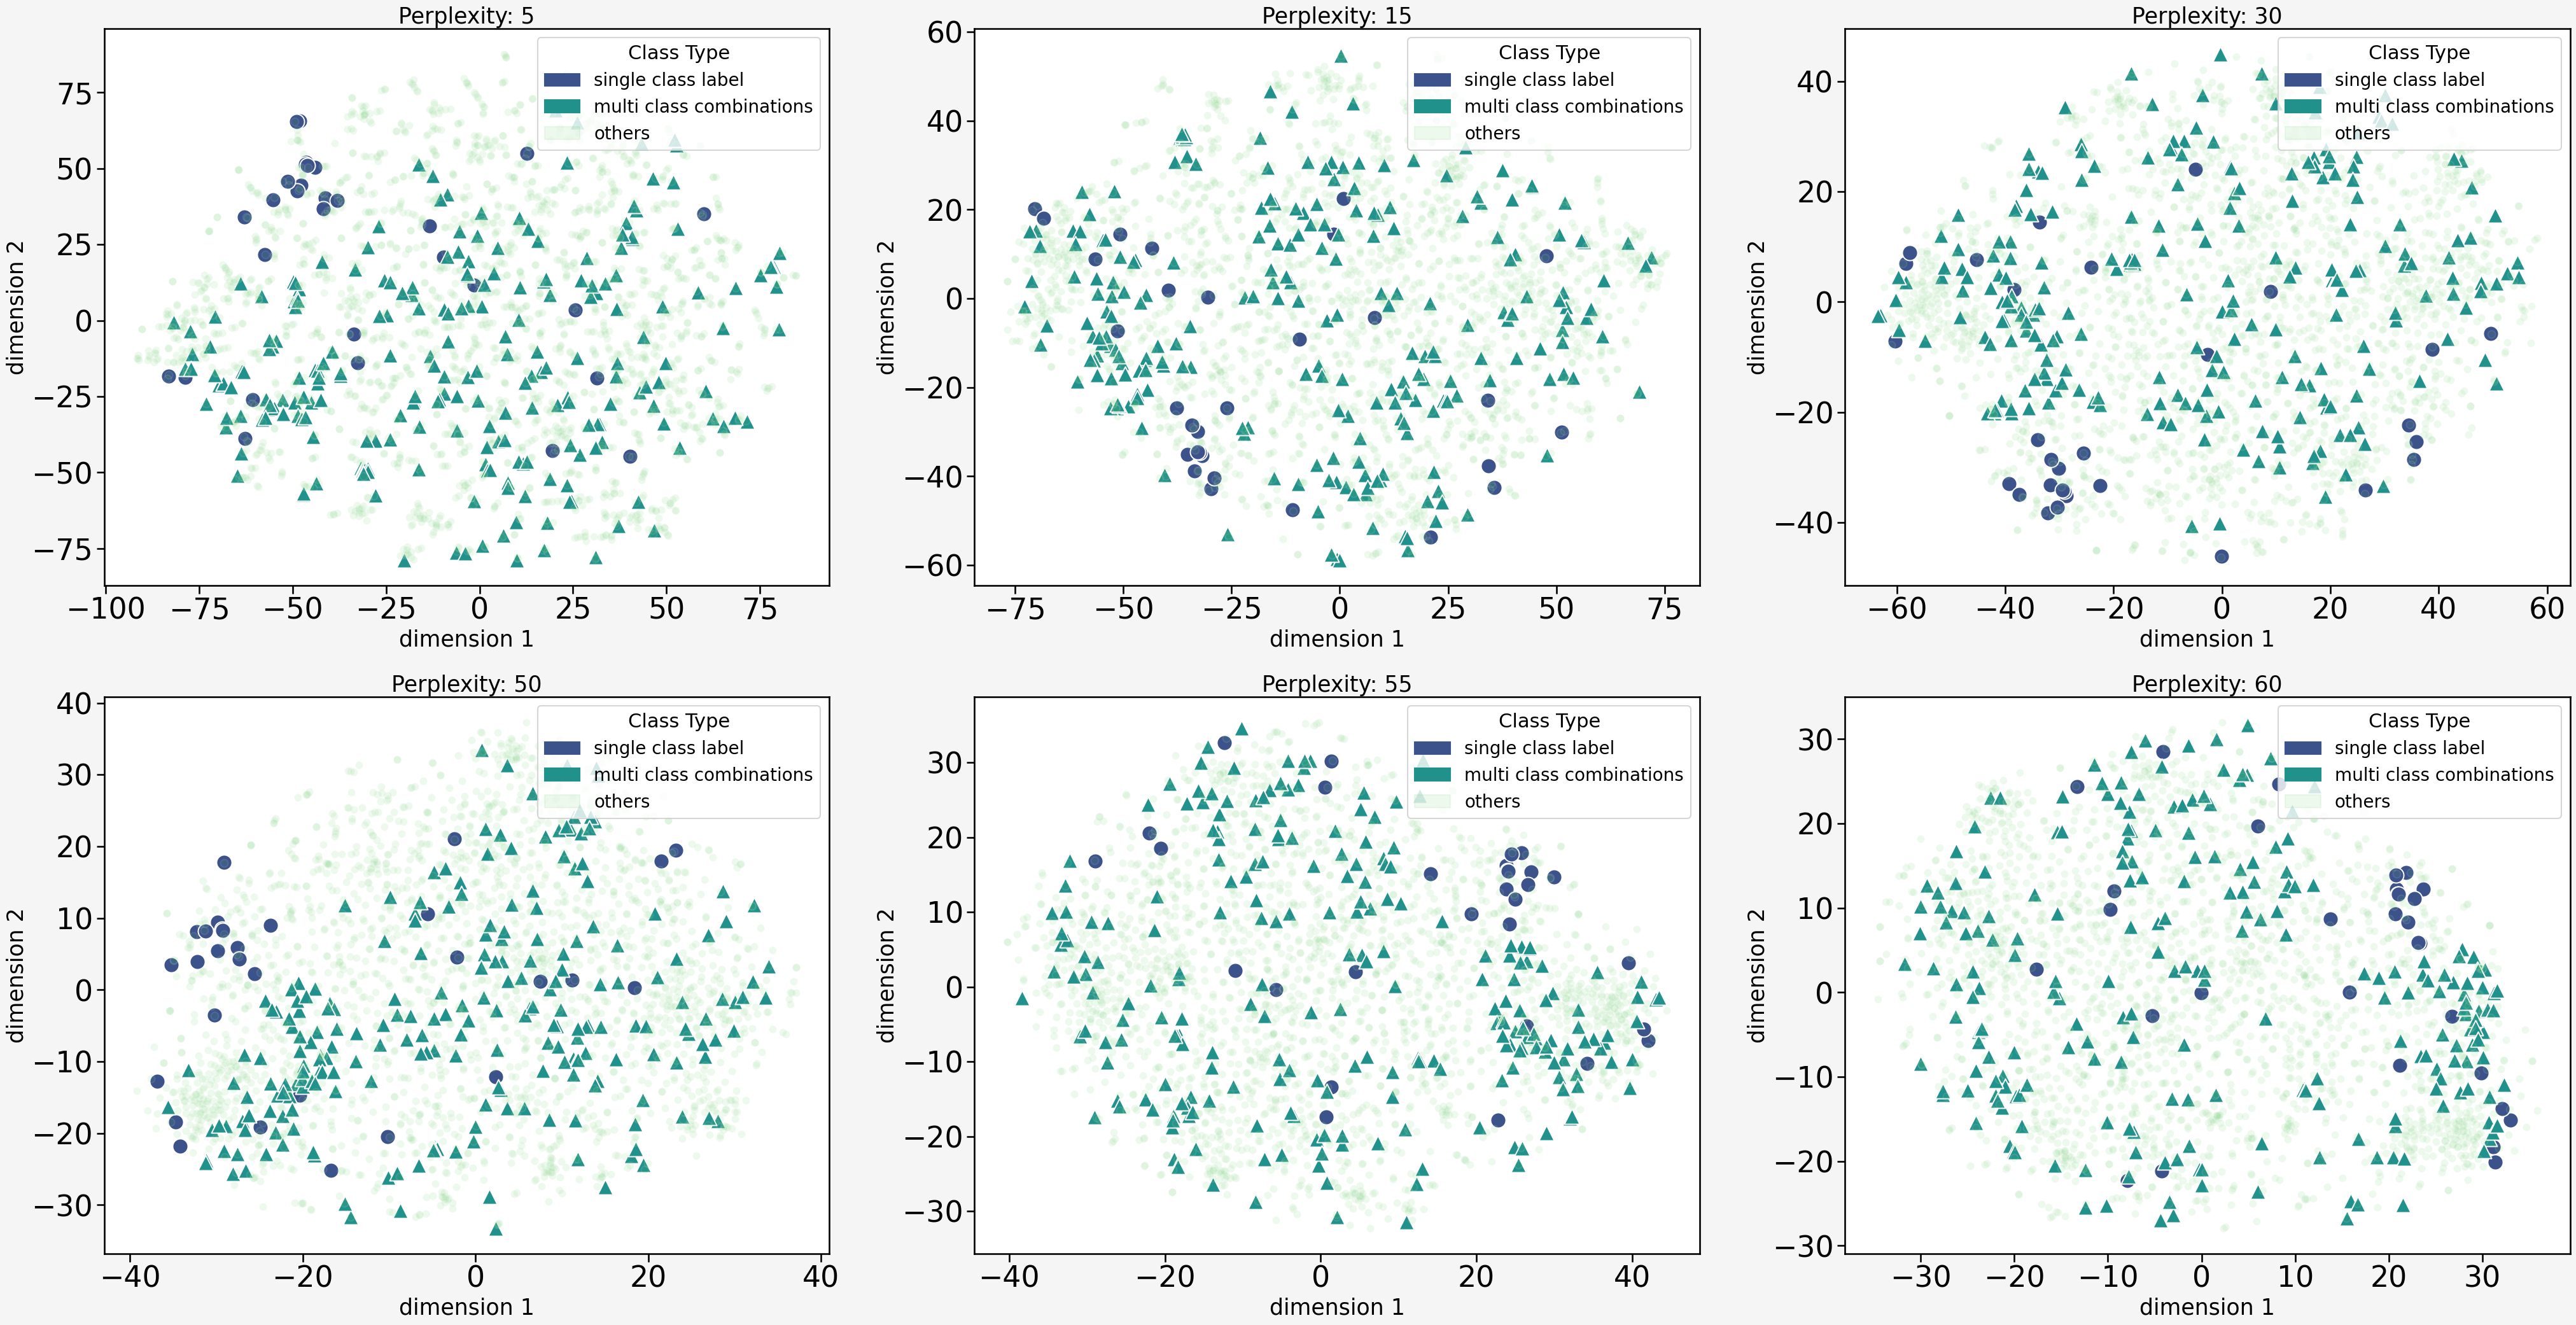

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

def plot_embedding(ax, data, title):
    colors = sns.color_palette("viridis", 3)
    
    sns.scatterplot(
        x='d1', y='d2',
        data=data[data['c'] == 0],
        color=colors[0],
        marker='o',
        ax=ax,
        s=300
    )
    sns.scatterplot(
        x='d1', y='d2',
        data=data[data['c'] == 1],
        color=colors[1],
        marker='^',
        ax=ax,
        s=300
    )
    sns.scatterplot(
        x='d1', y='d2',
        data=data[data['c'] == 2],
        color=colors[2],
        marker='.',
        ax=ax,
        alpha=0.1,
        legend=False,
        s=300
    )
    
    ax.set_title(title)

    ax.set_xlabel('dimension 1')
    ax.set_ylabel('dimension 2')
    handles = [
        Patch(color=colors[0], label='single class label'),
        Patch(color=colors[1], label='multi class combinations'),
        Patch(color=colors[2], label='others', alpha=0.1)
    ]
    
    ax.legend(
        handles=handles,
        title='Class Type',
        title_fontsize='22',
        fontsize='20',
        loc='upper right',

    )

sns.set_context("talk", font_scale = 2)
plt.rcParams.update({
    'axes.titlesize': 25, 
    'axes.labelsize': 35,
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
})

f, ax = plt.subplots(2, 3, figsize=(50, 25))
ax = ax.flatten()
f.set_facecolor('#F5F5F5')

for i, p in enumerate(results.keys()):
    ax[i].set_facecolor('#FFFFFF')
    df_to_plot = results[p]
    plot_embedding(ax[i], df_to_plot, f'Perplexity: {p}')

plt.show()

In [143]:
from sklearn.manifold import Isomap
import pandas as pd

n_vals = [5, 10, 15, 20, 30, 40]
results = {}

for n in n_vals:
    print(f"Running Isomap for number of neighbors={n}...")
    iso_model = Isomap(n_components=2, n_neighbors=n)
    iso_res = iso_model.fit_transform(X)
    
    df_iso = pd.DataFrame(iso_res, columns=['d1', 'd2'])
    df_iso['c'] = Y['Colour'].values
    results[n] = df_iso

print("All Isomap computations are complete.")

Running Isomap for number of neighbors=5...
Running Isomap for number of neighbors=10...
Running Isomap for number of neighbors=15...
Running Isomap for number of neighbors=20...
Running Isomap for number of neighbors=30...
Running Isomap for number of neighbors=40...
All Isomap computations are complete.


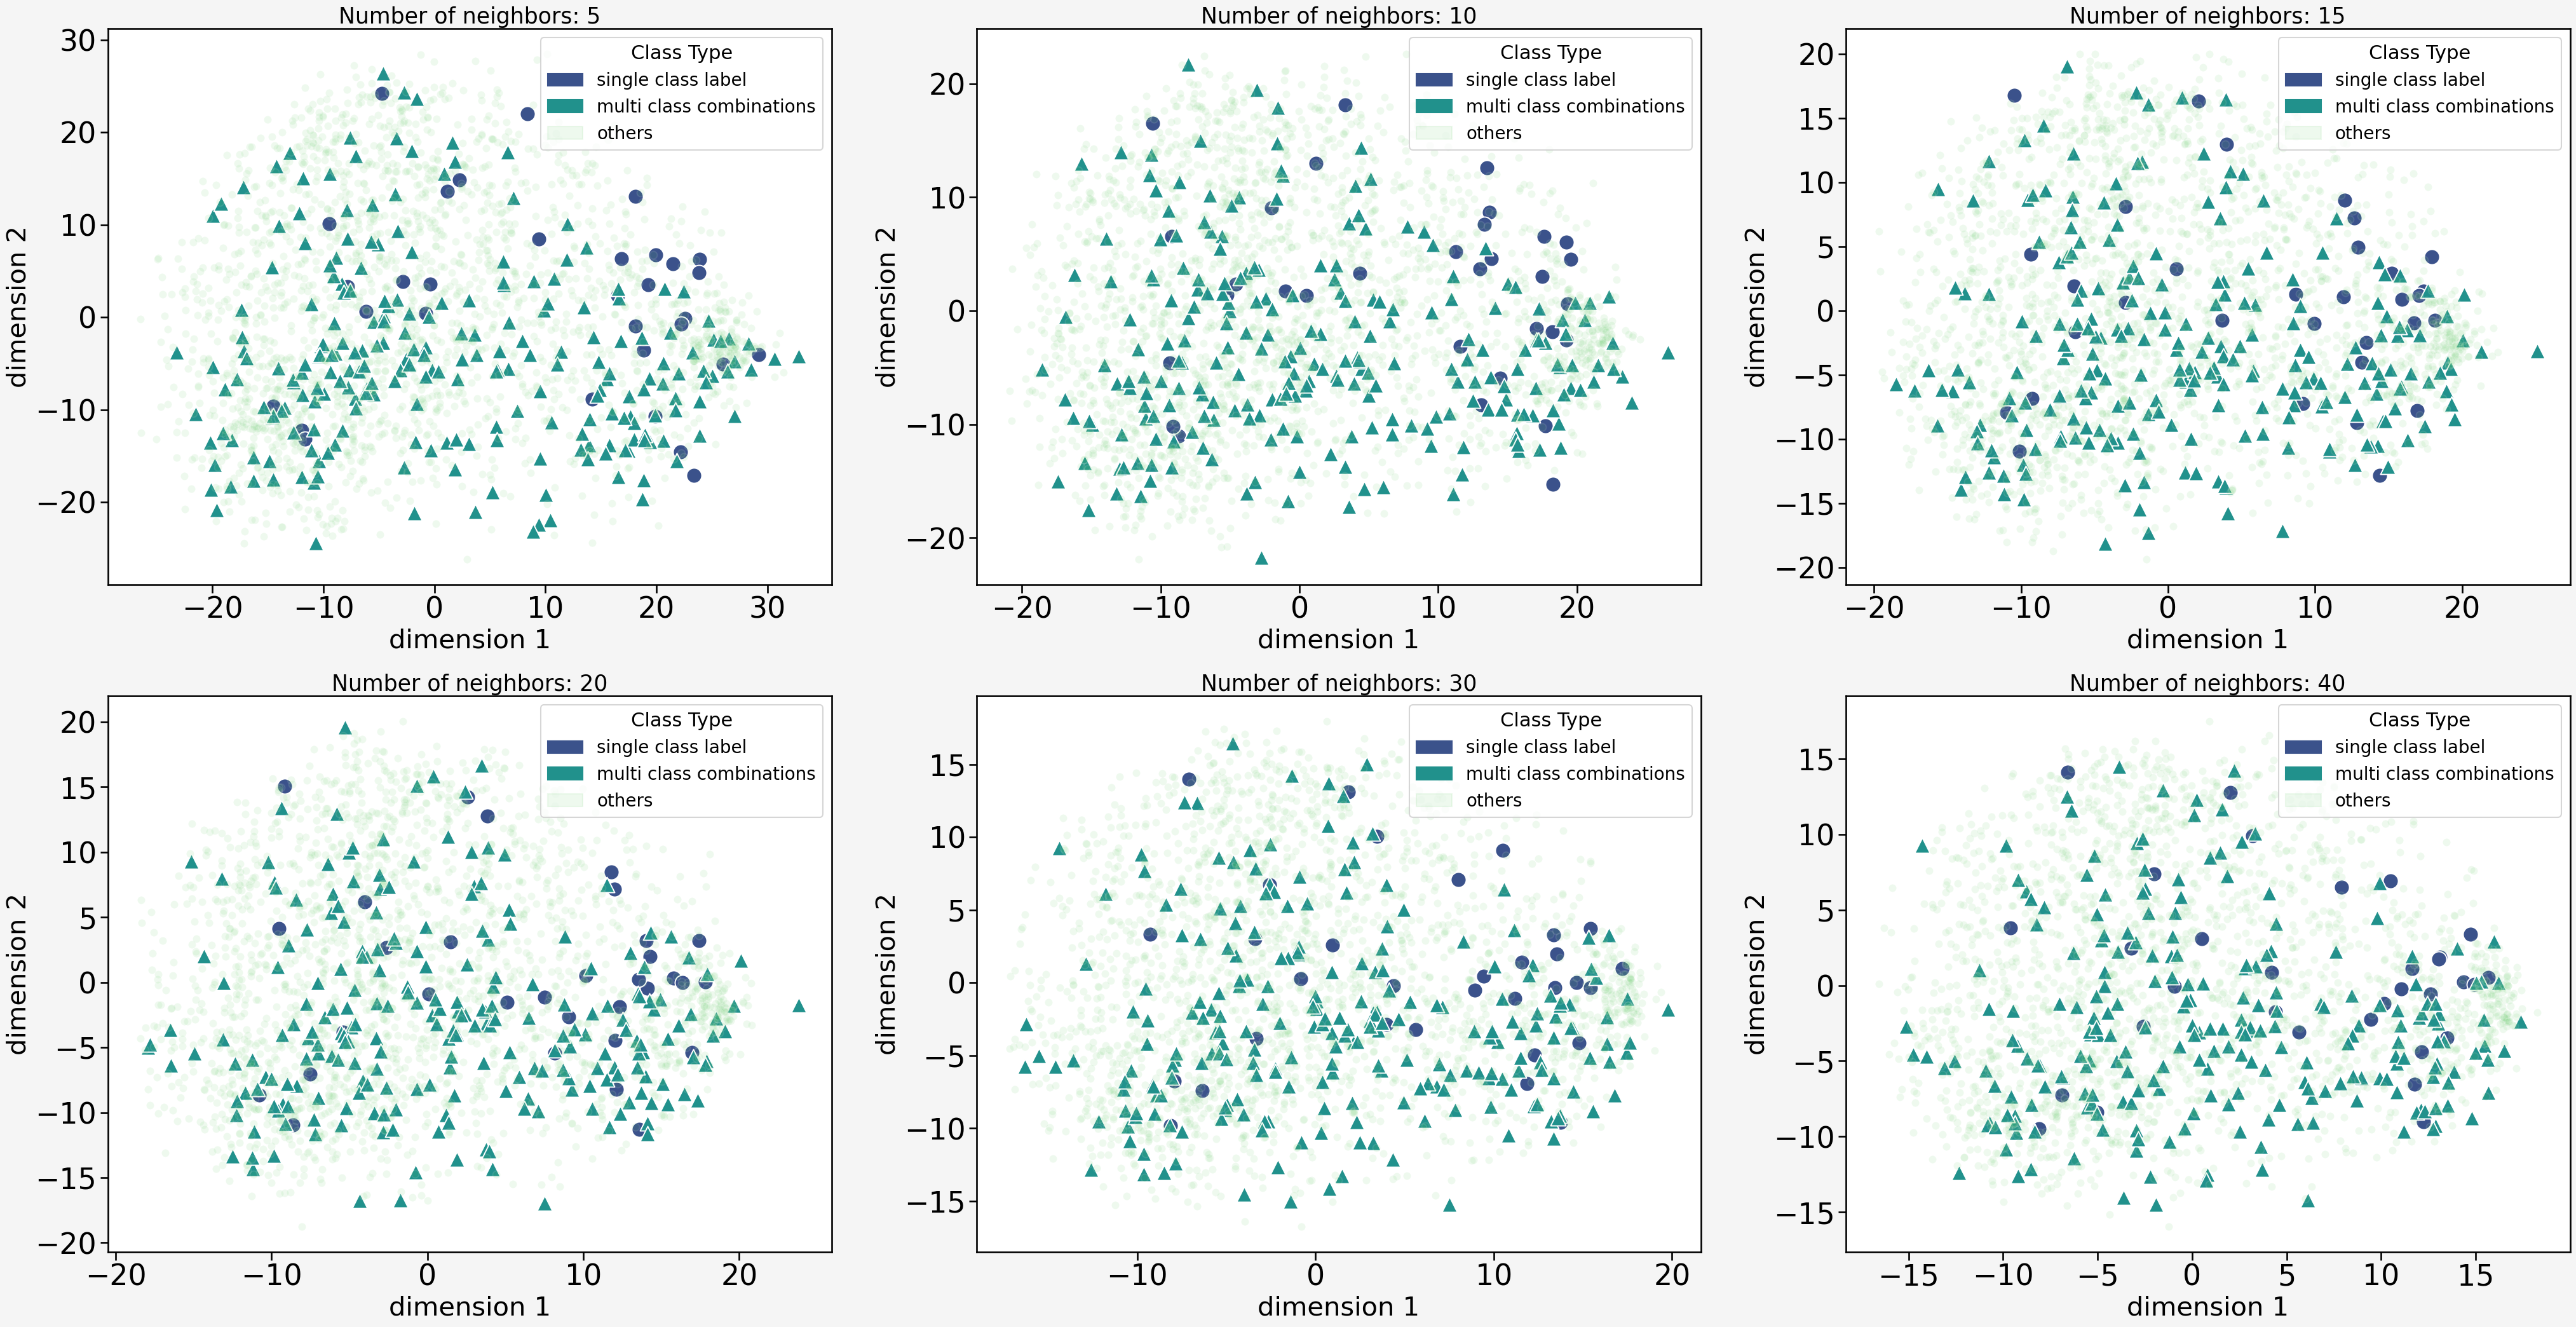

In [149]:
sns.set_context("talk", font_scale = 2)
plt.rcParams.update({
    'axes.titlesize': 25, 
    'axes.labelsize': 30,
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
})

f, ax = plt.subplots(2, 3, figsize=(50, 25))
ax = ax.flatten()
f.set_facecolor('#F5F5F5')

for i, n in enumerate(results.keys()):
    ax[i].set_facecolor('#FFFFFF')
    df_to_plot = results[n]
    plot_embedding(ax[i], df_to_plot, f'Number of neighbors: {n}')

plt.show()